In [1]:
print("Hello World")
import altair as alt
import pandas as pd
import geopandas as gpd # Requires geopandas -- e.g.: conda install -c conda-forge geopandas
alt.data_transformers.enable('json') 

Hello World


DataTransformerRegistry.enable('json')

In [2]:
csv_file = 'Names_hints/dpt2020.csv'

In [3]:
# Read the csv file to a dataframe
import pandas as pd
def read_csv(csv_file):
    df = pd.read_csv(csv_file, sep=';')
    return df

data = read_csv(csv_file=csv_file)
data.head(10)

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
5,1,_PRENOMS_RARES,1900,08,4
6,1,_PRENOMS_RARES,1900,09,6
7,1,_PRENOMS_RARES,1900,10,3
8,1,_PRENOMS_RARES,1900,11,11
9,1,_PRENOMS_RARES,1900,12,7


In [4]:
new_column_names = ['Gender', 'First name', 'Year','Department', 'Number of births']
data.columns = new_column_names
data

,Gender,First name,Year,Department,Number of births
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3727548,2,ZYA,2018,59,3
3727549,2,ZYA,XXXX,XX,264
3727550,2,ZYNA,2013,93,3
3727551,2,ZYNA,XXXX,XX,59


In [5]:
# drope rows with NaN values
data = data.dropna()
data

,Gender,First name,Year,Department,Number of births
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3727548,2,ZYA,2018,59,3
3727549,2,ZYA,XXXX,XX,264
3727550,2,ZYNA,2013,93,3
3727551,2,ZYNA,XXXX,XX,59


In [6]:
# drop rows with XXXX values
data = data[data['Year'] != 'XXXX']
data = data[data['Department'] != 'XX']
data

,Gender,First name,Year,Department,Number of births
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3727545,2,ZYA,2013,44,4
3727546,2,ZYA,2013,59,3
3727547,2,ZYA,2017,974,3
3727548,2,ZYA,2018,59,3


In [7]:
# convert the column 'Number of births' to integer, and the column 'Year' to datetime format
data['Number of births'] = data['Number of births'].astype(int)
data['Year'] = pd.to_datetime(data['Year'], format='%Y', errors='coerce').dt.strftime('%Y')
data

,Gender,First name,Year,Department,Number of births
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3727545,2,ZYA,2013,44,4
3727546,2,ZYA,2013,59,3
3727547,2,ZYA,2017,974,3
3727548,2,ZYA,2018,59,3


In [ ]:
# Conver Gender to Male and Female instead of 1 and 2

def get_gender(gender):
    if gender == 1 or gender == '1':
        return "Male"
    elif gender == 2 or gender == '2':
        return "Female"
    return "No binary"

data['Gender'] = data['Gender'].apply(get_gender)


In [8]:
# drop First name is "_PRENOMS_RARES"

data = data[data['First name'] != '_PRENOMS_RARES']
data

,Gender,First name,Year,Department,Number of births
10885,1,AADIL,1983,84,3
10886,1,AADIL,1992,92,3
10888,1,AAHIL,2016,95,3
10892,1,AARON,1962,75,3
10893,1,AARON,1976,75,3
...,...,...,...,...,...
3727545,2,ZYA,2013,44,4
3727546,2,ZYA,2013,59,3
3727547,2,ZYA,2017,974,3
3727548,2,ZYA,2018,59,3


In [9]:
data['First name'] = data['First name'].str.lower().str.capitalize()
data

/tmp/ipykernel_21536/1179538250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['First name'] = data['First name'].str.lower().str.capitalize()


,Gender,First name,Year,Department,Number of births
10885,1,Aadil,1983,84,3
10886,1,Aadil,1992,92,3
10888,1,Aahil,2016,95,3
10892,1,Aaron,1962,75,3
10893,1,Aaron,1976,75,3
...,...,...,...,...,...
3727545,2,Zya,2013,44,4
3727546,2,Zya,2013,59,3
3727547,2,Zya,2017,974,3
3727548,2,Zya,2018,59,3


In [12]:
# Most popular Female name in 2019
year = '2019'
gender = 'Female'
number_items = 10
most_popular_female_name_2019 = data[(data['Year'] == year) & (data['Gender'] == gender)].sort_values(by='Number of births', ascending=False).head(number_items)


<Axes: ylabel='Number of births'>

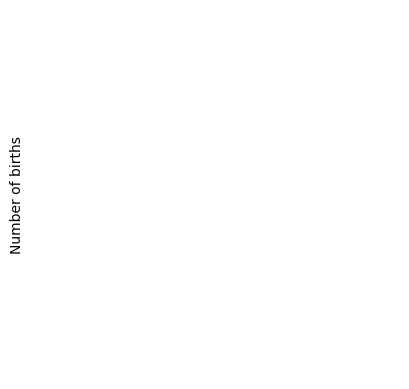

In [13]:
# plot most popular name in pie chart where the size of the pie is the number of births and with First name as label
most_popular_female_name_2019.plot(kind='pie',y='Number of births')


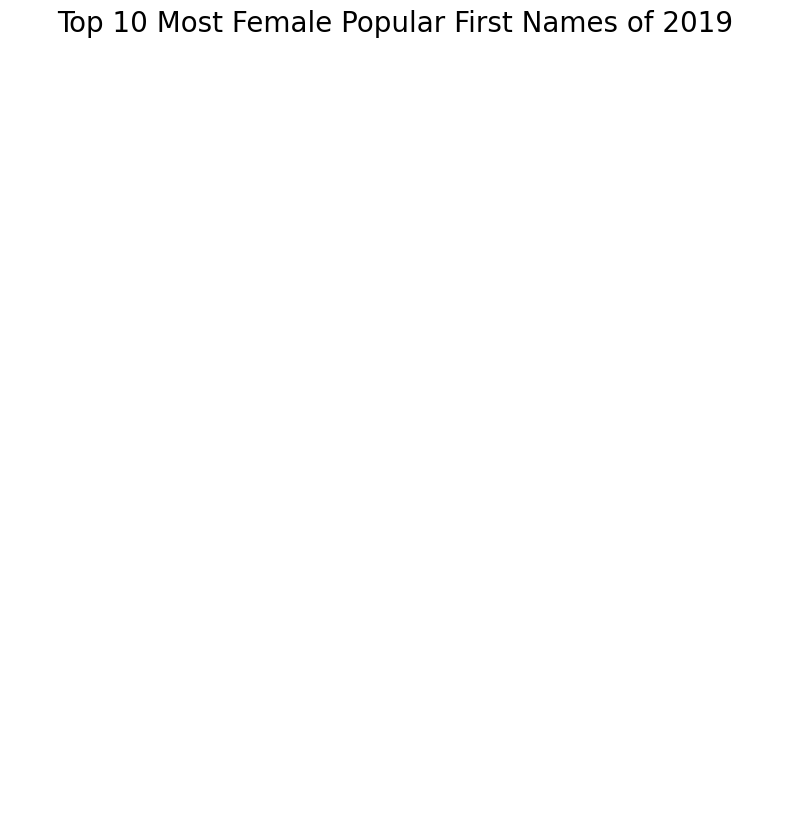

In [14]:
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'df' with your data
# If your data is in a csv file, you can read it into a DataFrame with pd.read_csv('yourfile.csv')

# First, we'll group the data by first name and sum up the number of births
grouped = most_popular_female_name_2019.groupby('First name')['Number of births'].sum()

# Then, let's sort it to get the most popular names
sorted_grouped = grouped.sort_values(ascending=False)

# For the pie chart, let's take the top 10 most popular names
top_10 = sorted_grouped[:10]

# Now we can plot the pie chart
plt.figure(figsize=(10,10))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%')
title = f"Top {number_items} Most {gender} Popular First Names of {year}"
plt.title(title, fontsize=20)
plt.show()

<Axes: xlabel='First name'>

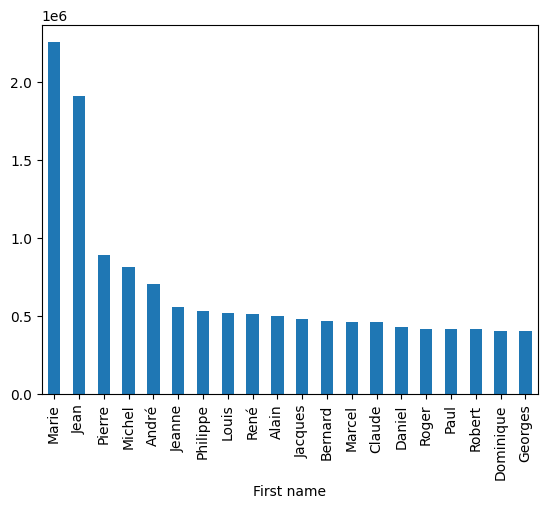

In [15]:
# list of 20 most popular Female names all time
number_items = 20
gender = 'Female'

most_popular_name = data.groupby('First name')['Number of births'].sum().sort_values(ascending=False).head(number_items)
most_popular_name.plot(kind='bar',y='Number of births')

In [16]:
# Assuming you have a pandas DataFrame named 'df' with your data
# If your data is in a csv file, you can read it into a DataFrame with pd.read_csv('yourfile.csv')

# Filter the data for only rows where the gender is Female
female_data = data[data['Gender'] == 'Female']

# Group the data by first name and sum up the number of births
grouped_female_data = female_data.groupby('First name')['Number of births'].sum()

# Sort the data in descending order
sorted_female_data = grouped_female_data.sort_values(ascending=False)

# Get the top 20 most popular female names
top_20_female_names = sorted_female_data[:20]

print(top_20_female_names)

Series([], Name: Number of births, dtype: int64)


<Axes: title={'center': 'Popularity of Marie over time'}, xlabel='Year'>

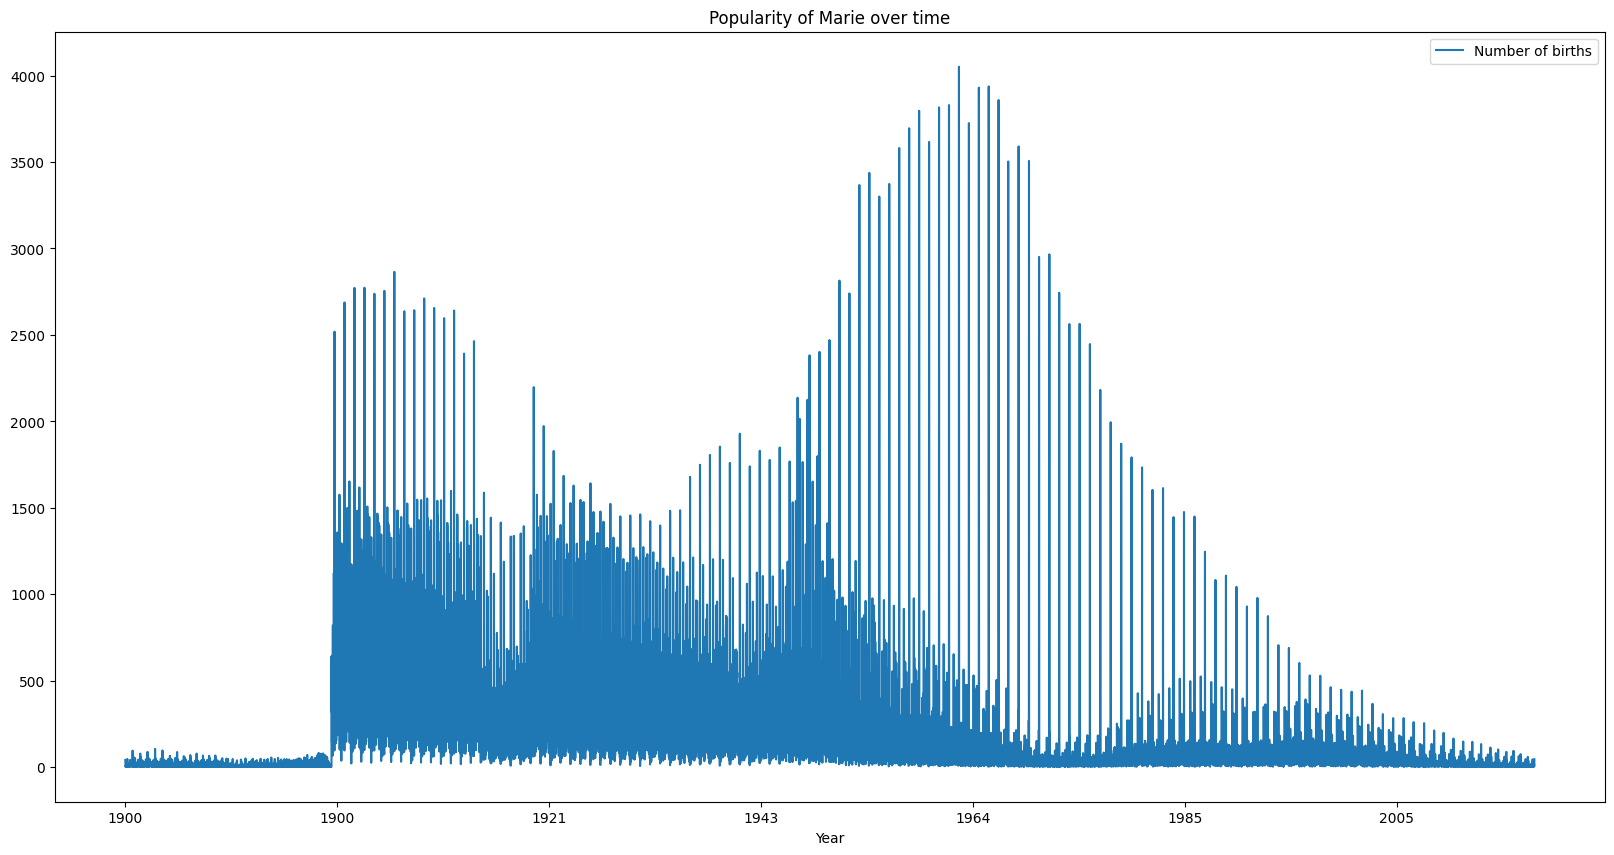

In [17]:
# evaluation of Marie popularity over time

name = 'Marie'
data[data['First name'] == name].plot(kind='line',x='Year',y='Number of births', title=f"Popularity of {name} over time", figsize=(20,10))

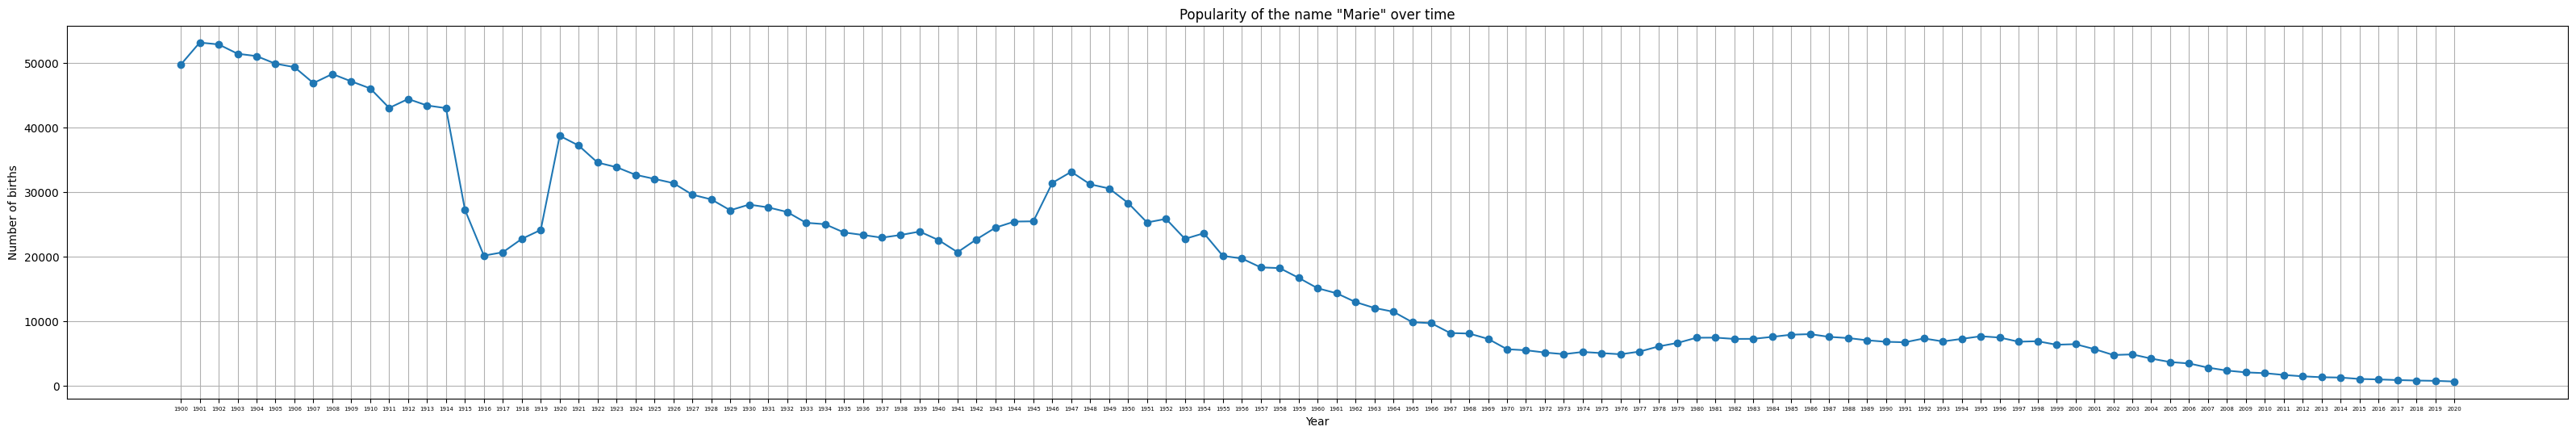

In [18]:


# Assuming you have a pandas DataFrame named 'df' with your data
# If your data is in a csv file, you can read it into a DataFrame with pd.read_csv('yourfile.csv')

# Filter the data for only rows where the first name is "Marie"
marie_data = data[data['First name'] == 'Marie']

# Group the data by year and sum up the number of births
grouped_marie_data = marie_data.groupby('Year')['Number of births'].sum()

# Plot the data
plt.figure(figsize=(40,6))
plt.xticks(fontsize=5)
plt.plot(grouped_marie_data.index, grouped_marie_data, marker='o')
plt.title('Popularity of the name "Marie" over time')
plt.xlabel('Year')
plt.ylabel('Number of births')
plt.grid()
plt.show()


In [20]:
geo_file = 'Names_hints/departements-version-simplifiee.geojson'
depts = gpd.read_file(geo_file)

depts.sample(5)

,code,nom,geometry
34,34,Hérault,"POLYGON ((3.35836 43.91383, 3.42445 43.91160, ..."
95,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.57203 49.06149, ..."
69,69,Rhône,"POLYGON ((4.38808 46.21979, 4.39205 46.26302, ..."
63,63,Puy-de-Dôme,"POLYGON ((2.56538 46.14303, 2.64069 46.11848, ..."
75,75,Paris,"POLYGON ((2.41634 48.84924, 2.46226 48.84254, ..."


In [21]:
data.sample(5)

,Gender,First name,Year,Department,Number of births
2048895,2,Camille,2010,28,37
2044663,2,Camille,1925,51,5
304493,1,Christian,2007,75,20
1937892,2,Annita,1958,85,4
400341,1,Dorian,2013,82,3


In [22]:
merged_data = pd.merge(data, depts, left_on='Department', right_on='code')
merged_data.sample(5)

,Gender,First name,Year,Department,Number of births,code,nom,geometry
3034915,1,Dylan,2012,36,3,36,Indre,"POLYGON ((1.32667 47.18623, 1.40143 47.21245, ..."
52923,1,Kamil,2010,92,9,92,Hauts-de-Seine,"POLYGON ((2.29097 48.95097, 2.32697 48.94536, ..."
742263,2,Clothilde,1997,06,3,06,Alpes-Maritimes,"POLYGON ((6.88743 44.36105, 6.92257 44.35073, ..."
157049,1,Eloi,2005,75,13,75,Paris,"POLYGON ((2.41634 48.84924, 2.46226 48.84254, ..."
2914646,2,Marie,1909,65,292,65,Hautes-Pyrénées,"MULTIPOLYGON (((-0.10308 43.24282, -0.12194 43..."


In [38]:
grouped_data = merged_data.groupby(['Department', 'First name','Gender'], as_index=False).agg({'Number of births': 'sum'})
grouped_data = depts.merge(grouped_data, left_on='code', right_on='Department')
grouped_data.sample(5)

,code,nom,geometry,Department,First name,Gender,Number of births
206940,92,Hauts-de-Seine,"POLYGON ((2.29097 48.95097, 2.32697 48.94536, ...",92,Enes,1,15
178054,78,Yvelines,"POLYGON ((2.20059 48.90868, 2.16838 48.89508, ...",78,Melodie,2,238
28707,16,Charente,"POLYGON ((-0.10294 45.96966, -0.04143 45.99348...",16,Line,2,26
40650,25,Doubs,"POLYGON ((6.80701 47.56280, 6.81666 47.54792, ...",25,Adnan,1,3
81523,42,Loire,"POLYGON ((3.89953 46.27591, 3.90940 46.25773, ...",42,Jannine,2,3


In [36]:
import pandas as pd
import pyarrow as pa
from shapely import wkt

grouped_data_2 = grouped_data

grouped_data_2['geometry'] = grouped_data_2['geometry'].apply(lambda x: str(x))


/home/hgal/personal/telecom/visualization/mini_projrct/.env/lib/python3.9/site-packages/geopandas/geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [41]:
name = 'Marie'


subset = grouped_data[grouped_data['First name'] == name]
alt.Chart(subset).mark_geoshape(stroke='white').encode(
    tooltip=['nom', 'code', 'Number of births'],
    color='Number of births',
).properties(width=800, height=600, title=f'Popularity of the name {name} over time')


alt.Chart(...)